$$\require{mhchem}$$

# Adiabatic Flame Temperature: Full Equilibrium with Cantera

The adiabatic flame temperature is the temperature achieved when a given fuel-oxidizer combination is combusted in a perfectly insulated reactor. If no energy is lost to the surroundings via heat transfer and the reaction occurs at constant pressure, conservation of energy dictates that the total enthalpy of the reactants is equal to the total enthalpy of the products. Defining _state 1_ as the reactants and _state 2_ as the products, we can write:

$$h_{\text{mix}, 2} = h_{\text{mix}, 1}$$

The enthalpy of the mixture has two components:

1. the enthalpy of formation: $\Delta^{\circ}_{\text{f}}h$ 
2. the sensible enthalpy: $h_i$

To make this more concrete, let's pick a specific reaction: stoichiometric combustion of methane, $\ce{CH4}$ with air:

$$\ce{CH4 + 2 O2 + $7.52$N2 <=> 2 H2O + CO2 + $7.52$N2}$$

From the reaction stoichiometry (note that the net stoichiometric coefficient for $\ce{N2}$ is zero), the heat of combustion released by this reaction is:

$$\begin{aligned}q_{\text{rxn}} &= -\sum_k \nu_k \Delta^{\circ}_{\text{f}}h_k\\
&= \Delta^{\circ}_{\text{f}}h_{\rm CH_4} + 2\Delta^\circ_{\rm f}h_{\rm O_2} - \Delta^\circ_{\rm f}h_{\rm CO_2}-2 \Delta^\circ_{\rm f}h_{\rm H_2O}\end{aligned}$$

where $\nu_k$ is the stoichiometric coefficient of species $k$, which is positive for products and negative for reactants. By definition, the heat of reaction is released at the reference temperature.

However, since the reaction must occur at constant enthalpy, the heat released must be stored in the products. In essence, the heat is used to heat the products from the initial, reference, temperature to a final temperature:

$$\begin{aligned}q_{\text{heating}} &= \sum_k\nu_{\text{prod},k}\left[h_k\left(T_2\right) - h_k\left(T_1\right)\right]\\
&= h_{\ce{CO2}}\left(T_2\right) - h_{\ce{CO_2}}\left(T_1\right) + 2\left[h_{\ce{H2O}}\left(T_2\right) - h_{\ce{H2O}}\left(T_1\right)\right] + 7.52\left[h_{\ce{N2}}\left(T_2\right) - h_{\ce{N_2}}\left(T_1\right)\right]\end{aligned}$$

where, again, states 1 and 2 represent the final and initial states, respectively. $\nu_{\text{prod}}$ is the product stoichiometric coefficient. Note that this assumes complete combution - there are no reactant species left to heat.

For a purely adiabatic reaction, we will have $q_{\rm rxn} = q_{\rm heating}$, and hence:

$$\sum_k\nu_{\text{prod},k}\left[h_k\left(T_2\right) - h_k\left(T_1\right)\right] + \sum_k \nu_k \Delta^{\circ}_{\text{f}}h_k = 0$$

or:

$$h_{\ce{CO2}}\left(T_2\right) - h_{\ce{CO_2}}\left(T_1\right) + 2\left[h_{\ce{H2O}}\left(T_2\right) - h_{\ce{H2O}}\left(T_1\right)\right] + 7.52\left[h_{\ce{N2}}\left(T_2\right) - h_{\ce{N_2}}\left(T_1\right)\right] + \Delta^{\circ}_{\text{f}}h_{\rm CH_4} + 2\Delta^\circ_{\rm f}h_{\rm O_2} - \Delta^\circ_{\rm f}h_{\rm CO_2}-2 \Delta^\circ_{\rm f}h_{\rm H_2O} = 0$$

Note that only a few variables are dependent on the final temperature $T_2$.  We might be tempted to write the above equation in terms of those variables, but let's hold off for now. Our next step really depends on what method we use to solve the problem. In short, we need a means of calculating the enthalpy values, so that we may determine which value of $T_2$ satisfies our adiabatic condition.  

## Cantera - Full Equilibrium

In [another Notebook](./ad-flame-T-ct-comp-comb.ipynb), you learned how to find the adiabatic flame temperature assuming complete combustion. In that Notebook, the input file was restricted to two product species, plus nitrogen. In real combustion applications, of course, a wide array of minor product species and side reactions are possible that can impact $T_{ad}$ in ways that we might care about.

In general, performing calculations with Cantera involves three basic steps:

1. Identify or create a YAML-based input file.
2. Create Cantera phases and set initial conditions.
3. Run the calculation.

The only step requiring modification as compared to the [complete combustion Notebook](./ad-flame-T-ct-comp-comb.ipynb) is the first! We need a new input file to represent a more complex combustion chemistry. This is one of the most wonderfully powerful aspects of Cantera. You can simply change the input file without changing any of your code to see the effect of different assumptions on your calculation.

### Cantera input files, revisited

#### Mechanism files that come with Cantera.

From our previous input file, `methane.yaml`, we know that Cantera comes with a small collection of pre-defined iput files, and that one of these is `gri30.yaml`, which represents the GRI-3.0 mechanism for natural gas combustion developed in the 1970s and last updated in the 1990s.  In most cases, these mechanism files are included in Cantera for demonstration purposes only, and are not meant as an endorsement of that particular chemistry (this is particularly true in the case of `gri30.yaml`).

New and improved mechanisms are constantly developed and reported in the literature, representing the best-available data and community understanding. Many of these mechanisms are published in a format that is incompatible with Cantera, however. How can we use these input files in Cantera?

#### Conversion from Chemkin format

Most commonly, mechanisms are published and made available in a format consistent with the CHEMKIN software suite.  These input files can be converted to Cantera format, using the script `ck2yaml` (`ck` = "Chemkin").

We have downloaded the mechanism files for one such mechanism, the `NUIGMech1.1` from the National University of Ireland, Galway (http://www.nuigalway.ie/combustionchemistrycentre/mechanismdownloads/). These files are stored in the folder `input-files/NUIG`.

We will use the Python script called `ck2yaml` to convert these files into YAML format. In the Jupyter Notebook, you can prepend any line in a code cell by a bang (exclamation point, `!`) to run it as a shell script.

Let's do that to convert the NUIGMech1.1.

In [14]:
ip_file = "input-files/NUIG/NUIGMECH_1.1_HT.MECH"
th_file = "input-files/NUIG/NUIGMech1.1.THERM"
tr_file = "input-files/NUIG/NUIGMech1.1.TRAN"
op_file = "input-files/NUIG/nuig_11.yaml"
!ck2yaml --input={ip_file} --thermo={th_file} --transport={tr_file} --output={op_file}

Skipping unexpected species "C5H91OO2-3" while reading thermodynamics entry.
Skipping unexpected species "OVCCVCCJVO" while reading thermodynamics entry.
Skipping unexpected species "CVOCVCCOOH" while reading thermodynamics entry.
Skipping unexpected species "OVCCVCCOJ" while reading thermodynamics entry.
Skipping unexpected species "C3H6O3" while reading thermodynamics entry.
Skipping unexpected species "OCOCHO" while reading thermodynamics entry.
Skipping unexpected species "KHO2COCHO" while reading thermodynamics entry.
Skipping unexpected species "O2QCH2CO3H" while reading thermodynamics entry.
Skipping unexpected species "QCH2CO3H" while reading thermodynamics entry.
Skipping unexpected species "H2COCO#" while reading thermodynamics entry.
Skipping unexpected species "C3H6OOH1-2" while reading thermodynamics entry.
Skipping unexpected species "C3H6OOH1-3" while reading thermodynamics entry.
Skipping unexpected species "C3H6OOH2-1" while reading thermodynamics entry.
Skipping unexp

Skipping unexpected species "NC52ONEO2-3" while reading thermodynamics entry.
Skipping unexpected species "NC52ONEO2-4" while reading thermodynamics entry.
Skipping unexpected species "NC52ONEO2-5" while reading thermodynamics entry.
Skipping unexpected species "NC53ONEO2-1" while reading thermodynamics entry.
Skipping unexpected species "NC53ONEO2-2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-1O2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-2O2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-3O2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-4O2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-5O2" while reading thermodynamics entry.
Skipping unexpected species "C6H13OOH-1" while reading thermodynamics entry.
Skipping unexpected species "C6H13O2-1" while reading thermodynamics entry.
Skipping unexpected species "C6H13O2-2" while reading thermodynamic

We used 4 arguments to the converter:

1. `--input`: Specifies the location of the input file containing elements, species, reactions, and optionally thermodynamic information
2. `--thermo`: Specifies the location of the thermodynamic data, if it isn't present in the input file
3. `--transport`: Specifies the location of the transport data
4. `--output`: Specifies the location of the output YAML file

For this mechanism, the conversion process will result in many warnings and an error related to duplicate transport data for a species. This error prevents the successful output of the YAML file.

Most mechanism files have hundreds of species and sometimes thousands of reactions; errors can be quite common! We have catalogued some of the most common conversion errors, so that you can debug as necessary, available [here](https://cantera.org/tutorials/ck2yaml-tutorial.html#debugging-common-errors-in-ck-files).

Often, all that's necessary is to running the conversion script with the `--permissive` option:

In [15]:
!ck2yaml --input={ip_file} --thermo={th_file} --transport={tr_file} --output={op_file} --permissive

Skipping unexpected species "C5H91OO2-3" while reading thermodynamics entry.
Skipping unexpected species "OVCCVCCJVO" while reading thermodynamics entry.
Skipping unexpected species "CVOCVCCOOH" while reading thermodynamics entry.
Skipping unexpected species "OVCCVCCOJ" while reading thermodynamics entry.
Skipping unexpected species "C3H6O3" while reading thermodynamics entry.
Skipping unexpected species "OCOCHO" while reading thermodynamics entry.
Skipping unexpected species "KHO2COCHO" while reading thermodynamics entry.
Skipping unexpected species "O2QCH2CO3H" while reading thermodynamics entry.
Skipping unexpected species "QCH2CO3H" while reading thermodynamics entry.
Skipping unexpected species "H2COCO#" while reading thermodynamics entry.
Skipping unexpected species "C3H6OOH1-2" while reading thermodynamics entry.
Skipping unexpected species "C3H6OOH1-3" while reading thermodynamics entry.
Skipping unexpected species "C3H6OOH2-1" while reading thermodynamics entry.
Skipping unexp

Skipping unexpected species "NC52ONEO2-3" while reading thermodynamics entry.
Skipping unexpected species "NC52ONEO2-4" while reading thermodynamics entry.
Skipping unexpected species "NC52ONEO2-5" while reading thermodynamics entry.
Skipping unexpected species "NC53ONEO2-1" while reading thermodynamics entry.
Skipping unexpected species "NC53ONEO2-2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-1O2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-2O2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-3O2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-4O2" while reading thermodynamics entry.
Skipping unexpected species "C5H10OH-5O2" while reading thermodynamics entry.
Skipping unexpected species "C6H13OOH-1" while reading thermodynamics entry.
Skipping unexpected species "C6H13O2-1" while reading thermodynamics entry.
Skipping unexpected species "C6H13O2-2" while reading thermodynamic

Wrote YAML mechanism file to 'input-files/NUIG/nuig_11.yaml'.
Mechanism contains 923 species and 5966 reactions.
Validating mechanism...
For species CHV, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

For species OHV, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

PASSED


The result of including the `--permissive` option is to turn the errors related to duplicate transport data into warnings. It is certainly worth following up on these and investigating, for any research endeavor of import! But for today's demonstration, we will boldly forge on...

## Create the Cantera phase and set initial conditions

We will now create phases to represent both the full GRI 3.0 mechanism and the NUIG 1.1 Mechanism.

We are going to use the full GRI 3.0 mechanism, which comes with the Cantera installation.

The NUIG mechanism is indeed quite large, so loading the mechanism file takes a few seconds.

In [16]:
import cantera as ct
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [19]:
gas_gri = ct.Solution("gri30.yaml")
gas_nuig = ct.Solution("input-files/NUIG/nuig_11.yaml")

For species CHV, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

For species OHV, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314



<div class="alert alert-info" role="alert">

**Note:** Cantera produces a few warnings when loading the NUIG 1.1 mechanism about discontinuous thermodynamic polynomials for two species. These warnings are part of a validation check that Cantera does to make sure the thermodynamics data are consistent. In the standard NASA 14-coefficient polynomial form, the thermodynamics data are defined as two five coefficient polynomials (plus two other constants) over two temperature ranges. This is the form used for CHEMKIN files. The discontinuities occur when either the slope or the value of the thermodynamic functions ($c_p/R$, $h/(RT)$, or $s/R$) has a discontinuity at the mid-point temperature. Most commonly, one or more the discontinuities are due to incorrectly fit parameters, but they can also be caused by other means. You can learn how to debug these warnings in our [thermo debugging Notebook](../ncm-2019/thermo_debugging.ipynb).

</div>

The step that takes the longest when loading mechanism files is almost always calculating fits for the species transport data. Since we do not plan to conduct any simulations here where mass diffusion is present, we can disable the calculation of these fits by specifying `transport_model=None` when creating the `Solution`. This will substantially speed up loading large mechanisms.

In [23]:
ct.suppress_thermo_warnings()
%timeit ct.Solution("input-files/NUIG/nuig_11.yaml", transport_model=None)
%timeit ct.Solution("input-files/NUIG/nuig_11.yaml")

326 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.78 s ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Set initial conditions and run the calculation.

Now we can set our initial conditions and call the `equilibrate()` function to find the adiabatic flame temperature.

Fixing the state of the mixture requires two independent, intensive thermodynamic properties and the mole or mass fractions of each component. You can either set the mole or mass fractions directly, or use the [`set_equivalence_ratio()`](https://cantera.org/documentation/docs-2.5/sphinx/html/cython/thermo.html#cantera.ThermoPhase.set_equivalence_ratio) method to have Cantera calculate the mole fractions for a particular fuel/oxidizer mixture for you.

<div class="alert alert-danger" role="alert">

**Warning:** You should always set the composition of the mixture before setting other properties. Cantera holds the mixture temperature and _density_ constant when setting the composition. Thus, setting the composition may change the mixture pressure to satisfy the constraint on the density. Alternatively, you can use a three-property setter, like `gas.TPX` which automatically handles this for you.

</div>

In [27]:
fuel_string = "CH4:1.0"
ox_string = "O2:1.0, N2:3.76"

gas_gri.set_equivalence_ratio(1.0, fuel_string, ox_string)
gas_nuig.set_equivalence_ratio(1.0, fuel_string, ox_string)

gas_gri.TP = 298.15, ct.one_atm
gas_nuig.TP = 298.15, ct.one_atm

gas_gri.equilibrate("HP")
gas_nuig.equilibrate("HP")

T_ad_gri = gas_gri.T
T_ad_nuig = gas_nuig.T

print(f"T_ad for GRI 3.0 is {T_ad_gri:0.2f} K.")
print(f"T_ad for NUIG 1.1 is {T_ad_nuig:0.2f} K.")

T_ad for GRI 3.0 is 2224.62 K.
T_ad for NUIG 1.1 is 2224.20 K.


Not a whole lot of difference!  But note that they are both quite a bit lower (100 K) than for our "complete combustion" example.

We might also be interested to see how the chemical compositions vary:

In [29]:
species = ("CO2", "H2O", "CO", "CH4")
for s in species:
    print(f"{s} mole fraction is {gas_gri[s].X[0]:0.2e} for GRI 3.0, {gas_nuig[s].X[0]:0.2e}, for NUIG 1.1")

CO2 mole fraction is 8.54e-02 for GRI 3.0, 8.54e-02, for NUIG 1.1
H2O mole fraction is 1.83e-01 for GRI 3.0, 1.83e-01, for NUIG 1.1
CO mole fraction is 8.95e-03 for GRI 3.0, 8.98e-03, for NUIG 1.1
CH4 mole fraction is 3.00e-17 for GRI 3.0, 3.04e-17, for NUIG 1.1


We see that the two models give nearly identical results for $\ce{CO2}$ and $\ce{H2O}$, but have a small difference (on the order of 1% relative error) for $\ce{CO}$. The mole fraction of $\ce{CH4}$ is approximately on the order of the precision of a double, so can be treated as zero.

Comparing to complete combustion, we see that the $\ce{CO2}$ and $\ce{H2O}$ mole fractions are about 10% lower, relative to their values after complete combustion, which correlates, qualitatively, with the lower flame temperature.

## Automating our calculations to explore a wider composition space.

Using the `set_equivalence_ratio()` method, we can easily explore a range of initial fuel to oxidizer ratios:

In [30]:
npoints = 30
eq_ratios = np.linspace(0.1, 4.0, npoints)

# Initialize arrays to hold our flame temperatures:
T_ad_gri = np.zeros_like(eq_ratios)
T_ad_nuig = np.zeros_like(eq_ratios)

for j, phi in enumerate(eq_ratios):
    
    gas_gri.set_equivalence_ratio(phi, fuel_string, ox_string)
    gas_nuig.set_equivalence_ratio(phi, fuel_string, ox_string)
    
    # Remember to re-set your gas object temperatures - they are 
    # currently at the most recently calcualted T_ad value!
    #
    # The 'None' entry tells Cantera to leave the pressure as is
    gas_gri.TP = 298.15, None
    gas_nuig.TP = 298.15, None

    gas_gri.equilibrate("HP")
    gas_nuig.equilibrate("HP")
    
    T_ad_gri[j] = gas_gri.T
    T_ad_nuig[j] = gas_nuig.T

#### Now plot the results:

<IPython.core.display.Javascript object>


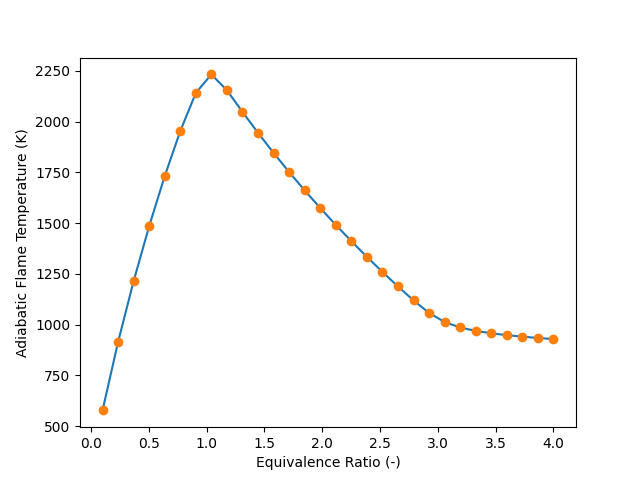

In [36]:
fig, ax = plt.subplots()
ax.plot(eq_ratios, T_ad_gri, '-')
ax.plot(eq_ratios, T_ad_nuig, 'o')
ax.set_xlabel("Equivalence Ratio (-)")
ax.set_ylabel("Adiabatic Flame Temperature (K)");

These look pretty similar! Let's just how similar they are by plotting the relative error between the values.

<IPython.core.display.Javascript object>


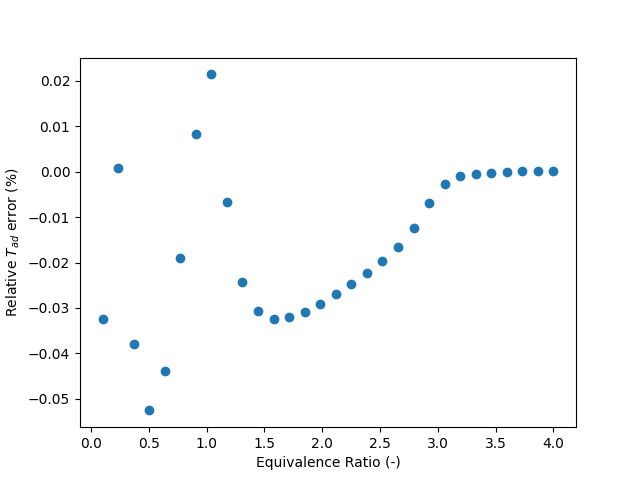

In [38]:
fig, ax = plt.subplots()

rel_error = 100 * (T_ad_gri - T_ad_nuig) / T_ad_nuig

ax.plot(eq_ratios, rel_error, 'o')
ax.set_xlabel("Equivalence Ratio (-)")
ax.set_ylabel("Relative $T_{ad}$ error (%)");

The error bounces around a little bit, but it's never more than 0.05%. This makes sense, since the thermodynamic properties for the species that make up the bulk of the products have been well characterized for decades, even prior to the creation of GRI-3.0.